<a href="https://colab.research.google.com/github/isakjo/oil_dacon/blob/master/oil_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import plotly.express as px

sns.set_style('whitegrid')
sns.set(font_scale=1.0)
plt.style.use('seaborn-white')

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/eda_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/eda_data/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/eda_data/sample_submission.csv')
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
column_info = pd.read_excel('/content/drive/MyDrive/eda_data/data_info.xlsx')
column_info.values

array([['COMPONENT_ARBITRARY', '샘플 오일 관련 부품 (Component 4종, 비식별화)', nan,
        nan],
       ['ANONYMOUS_1', '무명 Feautre 1. 수치형 데이터', nan, nan],
       ['YEAR', '오일 샘플 및 진단 해 (Year)', nan, nan],
       ['SAMPLE_TRANSFER_DAY', '오일 샘플링 후 진단 기관으로 이동한 기간 (Days)', nan,
        nan],
       ['ANONYMOUS_2', '무명 Feautre 2. 수치형 데이터', nan, nan],
       ['AG', '원소기호 AG - Silver 함유량', 'ppm', nan],
       ['AL', '원소기호 AL - Aluminium 함유량', 'ppm', nan],
       ['B', '원소기호 B - Boron 함유량', 'ppm', nan],
       ['BA', '원소기호 BA - Barium 함유량', 'ppm', nan],
       ['BE', '원소기호 BE - Beryllium 함유량', 'ppm', nan],
       ['CA', '원소기호 CA - Calcium 함유량', 'ppm', nan],
       ['CD', '원소기호 CD - Cadmium 함유량', 'ppm', nan],
       ['CO', '원소기호 CO - Cobolt 함유량', 'ppm', nan],
       ['CR', '원소기호 CR - Chromium 함유량', 'ppm', nan],
       ['CU', '원소기호 CU - Copper 함유량', 'ppm', nan],
       ['FH2O', 'Water 수치(By FT-IR)', '단위 없음', nan],
       ['FNOX', 'NOx 수치(By FT-IR)', '단위 없음', nan],
       ['FOPTIMETHGLY', '비식별화', '단위 없음', 

In [ ]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [ ]:
test.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

In [ ]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
test.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
train.describe()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000
mean,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,...,4.908194,9.211990,36.054558,824.764243,2917.505144,0.050656,3.586937,109.355815,588.646825,0.085349
std,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,...,41.020482,77.541901,279.003143,6309.799089,17035.703767,0.475438,6.011493,49.612379,531.743393,0.279411
min,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000
25%,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.800000,37.000000,0.000000
50%,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.300000,520.000000,0.000000
75%,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.100000,137.200000,1119.000000,0.000000
max,294451.000000,2022.000000,368.000000,9650.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,6609.000000,...,1651.000000,2932.000000,11296.000000,412627.000000,844421.000000,17.000000,29.900000,2840.500000,2132.000000,1.000000


In [ ]:
train.corr()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
ANONYMOUS_1,1.000000,0.106546,-0.041395,0.072154,-0.025674,0.017924,0.013467,-0.064204,-0.010805,-0.015321,...,-0.009357,-0.010268,-0.013404,-0.008835,-0.007291,0.001883,-0.019269,0.019542,-0.019991,0.044197
YEAR,0.106546,1.000000,-0.094086,0.138199,-0.129124,-0.017525,0.011145,-0.098589,-0.063859,0.090465,...,0.005424,-0.001902,0.001675,0.013750,0.013154,-0.027624,0.014717,-0.051584,0.048572,-0.087871
SAMPLE_TRANSFER_DAY,-0.041395,-0.094086,1.000000,-0.000060,0.021211,-0.017493,0.004305,0.016909,0.009600,0.008826,...,0.003158,0.006045,0.009020,0.002696,0.002913,-0.002412,0.008072,0.013896,-0.019428,-0.004315
ANONYMOUS_2,0.072154,0.138199,-0.000060,1.000000,-0.006266,-0.022788,-0.100307,-0.011871,0.011162,-0.043046,...,-0.001629,-0.002803,-0.003637,-0.006123,-0.004636,-0.006469,0.005821,-0.025339,0.032758,-0.033641
AG,-0.025674,-0.129124,0.021211,-0.006266,1.000000,0.019600,-0.028131,0.031649,0.020884,-0.004489,...,0.001875,0.001149,-0.008987,-0.008421,-0.008662,-0.003853,-0.005550,0.013592,0.002631,0.014671
AL,0.017924,-0.017525,-0.017493,-0.022788,0.019600,1.000000,0.000037,0.240863,-0.000858,-0.070322,...,0.003058,0.002697,0.004091,0.001940,-0.000484,0.026213,-0.015007,0.013823,-0.024873,0.370512
B,0.013467,0.011145,0.004305,-0.100307,-0.028131,0.000037,1.000000,-0.045454,-0.013252,0.356121,...,-0.003540,-0.002488,0.002253,0.007316,0.002893,0.018197,-0.003663,-0.000882,-0.006463,-0.029787
BA,-0.064204,-0.098589,0.016909,-0.011871,0.031649,0.240863,-0.045454,1.000000,0.029900,-0.008642,...,0.006589,0.008902,0.002548,-0.003303,-0.001575,0.000480,-0.008943,0.004150,-0.009574,0.104840
BE,-0.010805,-0.063859,0.009600,0.011162,0.020884,-0.000858,-0.013252,0.029900,1.000000,0.006735,...,-0.004385,-0.004418,-0.005090,-0.004288,-0.003555,0.000482,0.023023,0.001359,0.012394,0.010685
CA,-0.015321,0.090465,0.008826,-0.043046,-0.004489,-0.070322,0.356121,-0.008642,0.006735,1.000000,...,-0.007894,-0.004135,0.000669,-0.005901,-0.001370,-0.014419,0.015750,-0.059102,0.110625,-0.150379


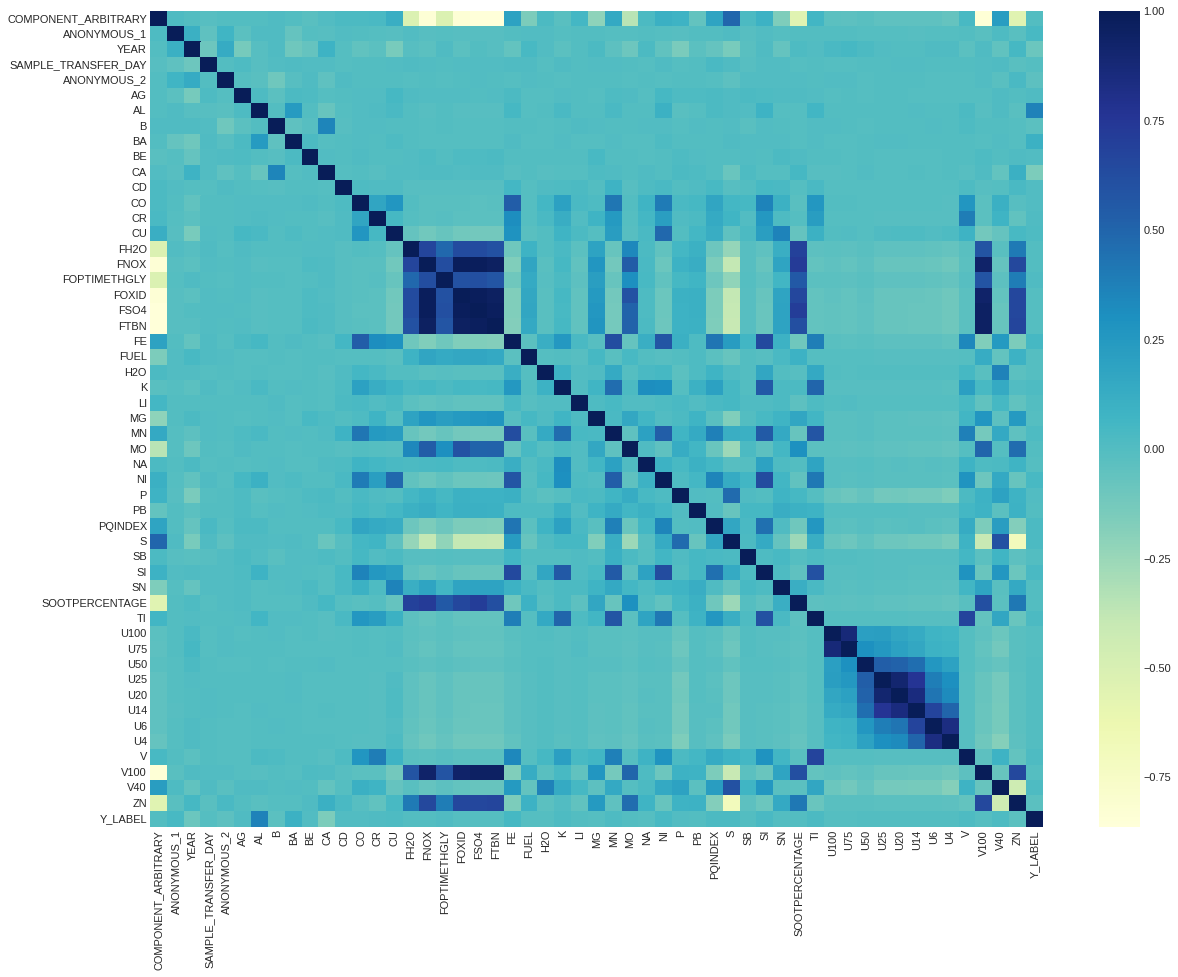

In [ ]:
from sklearn.preprocessing import LabelEncoder


categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
corr_train = train

for i in categorical_features:
  le = LabelEncoder()
  le = le.fit(train[i])
  corr_train[i] = le.transform(train[i])

fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr_train.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
train['AL'].describe()

count    14095.000000
mean        12.707698
std         86.968000
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4630.000000
Name: AL, dtype: float64

In [ ]:
# 오일이 정상이 아닌것에 대한 AL

train[train['Y_LABEL'] == 1]['AL'].describe()

count    1203.000000
mean      118.188695
std       276.348977
min         0.000000
25%         3.000000
50%        22.000000
75%       112.000000
max      4630.000000
Name: AL, dtype: float64

In [ ]:
train[train['Y_LABEL'] == 0]['AL'].describe()

count    12892.000000
mean         2.864877
std          3.630611
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         57.000000
Name: AL, dtype: float64

In [ ]:
train[['COMPONENT_ARBITRARY', 'Y_LABEL']].groupby(['COMPONENT_ARBITRARY'], as_index=True).count()

,Y_LABEL
COMPONENT_ARBITRARY,
COMPONENT1,3890
COMPONENT2,2316
COMPONENT3,7050
COMPONENT4,839


In [ ]:
pd.crosstab(train['COMPONENT_ARBITRARY'], train['Y_LABEL'], margins=True).style.background_gradient(cmap='summer_r')

Y_LABEL,0,1,All
COMPONENT_ARBITRARY,,,
COMPONENT1,3578,312,3890
COMPONENT2,2110,206,2316
COMPONENT3,6415,635,7050
COMPONENT4,789,50,839
All,12892,1203,14095


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


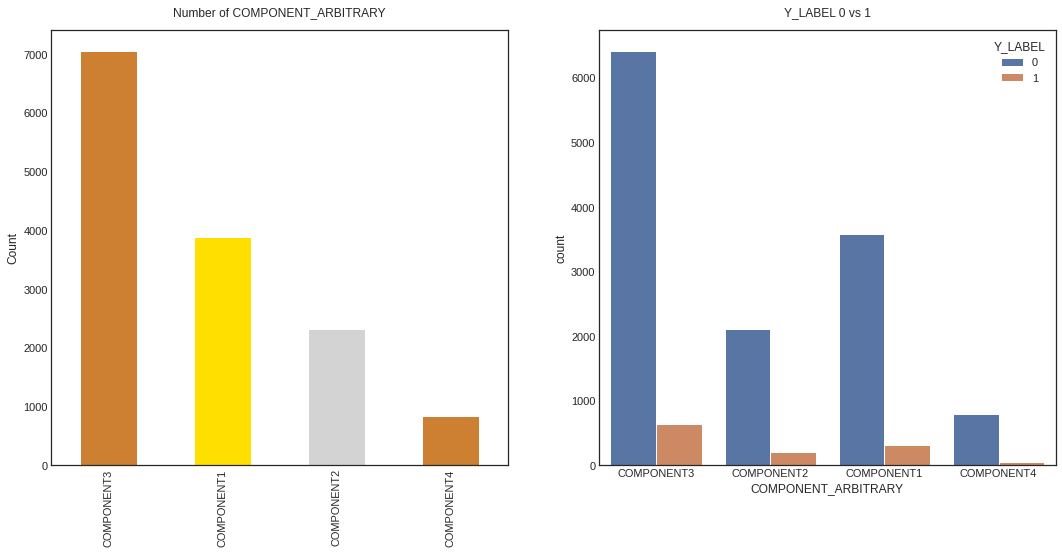

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['COMPONENT_ARBITRARY'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of COMPONENT_ARBITRARY', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('COMPONENT_ARBITRARY', hue='Y_LABEL', data=train, ax=ax[1])
ax[1].set_title('Y_LABEL 0 vs 1', y=y_position)
plt.show()

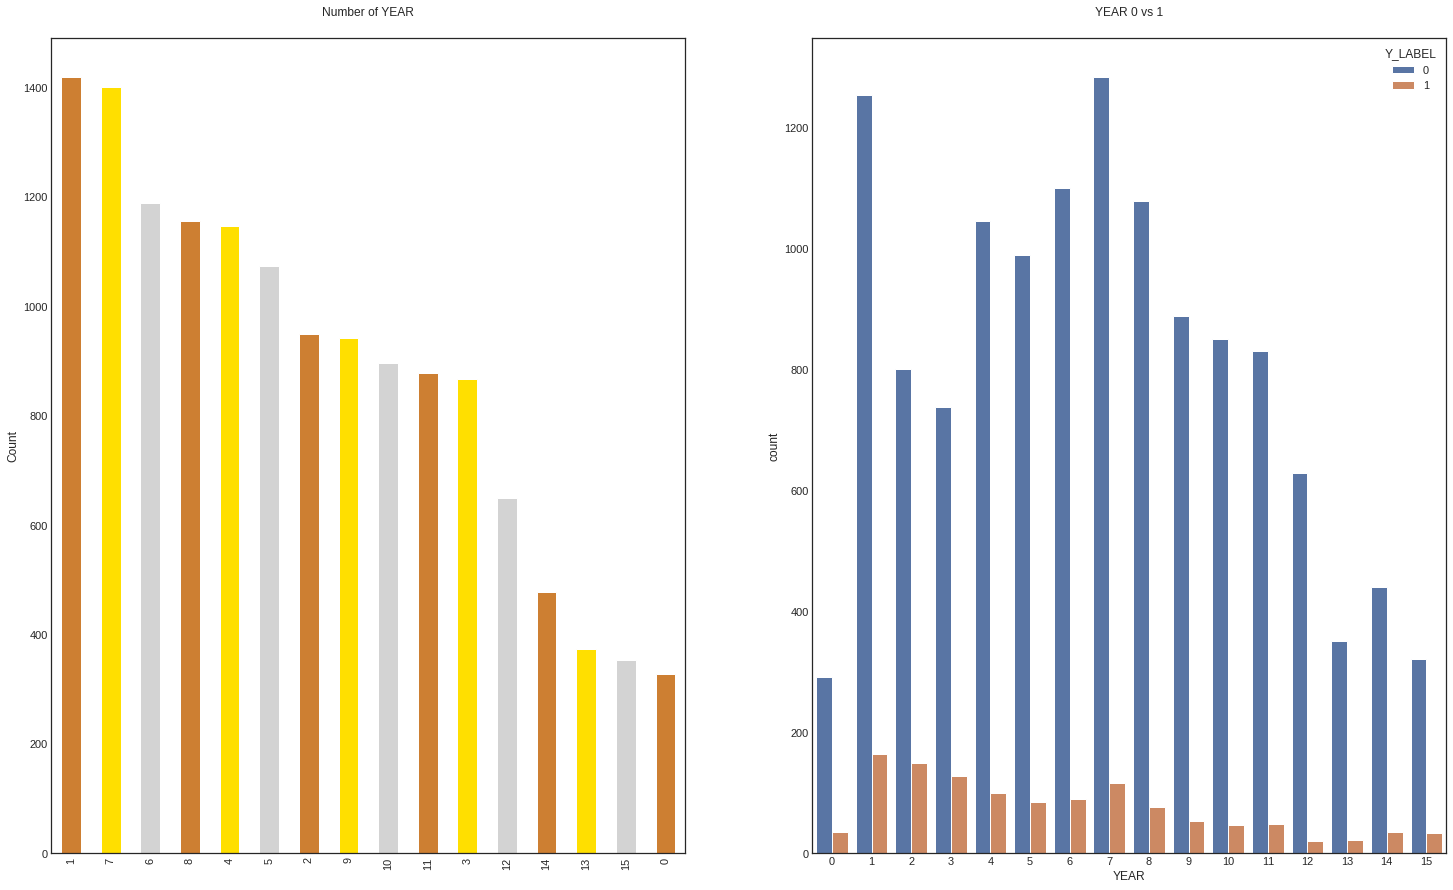

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(25, 15))
train['YEAR'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of YEAR', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('YEAR', hue='Y_LABEL', data=train, ax=ax[1])
ax[1].set_title('YEAR 0 vs 1', y=y_position)
plt.show()

In [ ]:
# missingno 를 이용해서 결측치를 시각화하는것도 좋은 방법이다! 해봐야겠다